# Recommender Systems

Recommender systems provide background work
- for users – reducing the information overload, personal assistants, social contacts
- for business – personalizing the contact with customers, reputation systems <br>
Modern search systems are also recommender systems

## Types of Systems
__Simple recommenders__
- offer generalized recommendations to every user, based on the popularity calculated by certain metric or score 

__Content-based recommenders__
- makes analysis of a particular item’s features/content
- suggests items similar to this item based on match between the user and the item<br>

__Collaborative filtering engines__
- try to predict the rating or preference that a user would give an item based on past ratings of this user and preferences of other users<br>

__Knowledge-Based Recommendations__
- based on related features in metadata about the product and the user

## 1. Simple Recommender

Procedure: 
- Decide on the metric to rate movies on
- Calculate the score for every movie based on the metric
- Sort the movies based on the score and output the top results

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

### 1.1. Data Preparation

Pandas reads data files and loads the data into datasets. <br>The data type of the columns - dtype can be specified before the reading, or guessed by Pandas. <br>Type can be determined only after the whole file is read. As it takes lots of memory, parameter <b>low_memory=False</b> is needed.

In [ ]:
# Load data from file
data = pd.read_csv(r'C:\Users\jakob\DAT1E22Bxd\Semester4\BI BusinessIntelligence\Week1\Data\movies_metadata.csv', sep=',', low_memory=False)
# data = pd.read_csv('http://www.kaggle.com/rounakbanik/the-movie-dataset', low_memory=False)

In [ ]:
# Check the size of data
data.shape

(45466, 24)

In [ ]:
# Print the first three rows to get idea about the data
data.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [ ]:
# See which movies are rated
data['title']

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45461                         Subdue
45462            Century of Birthing
45463                       Betrayal
45464               Satan Triumphant
45465                       Queerama
Name: title, Length: 45466, dtype: object

In [ ]:
# see the columns and column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
# Check the statistics of the numeric data
data.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


<Axes: >

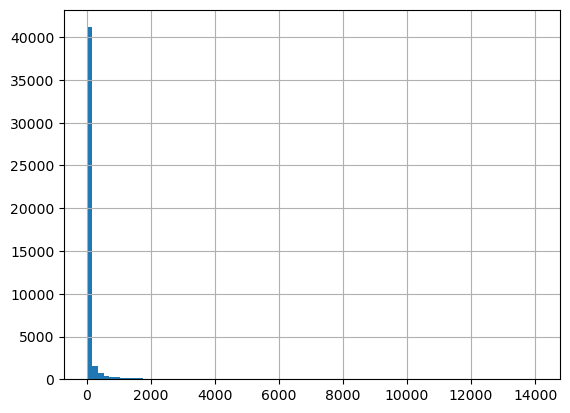

In [ ]:
# See the distribution of votes
data['vote_count'].hist(bins=80)

The histogram shows that most movies have few ratings. <br>Movies with most ratings are those that are most famous.

<Axes: >

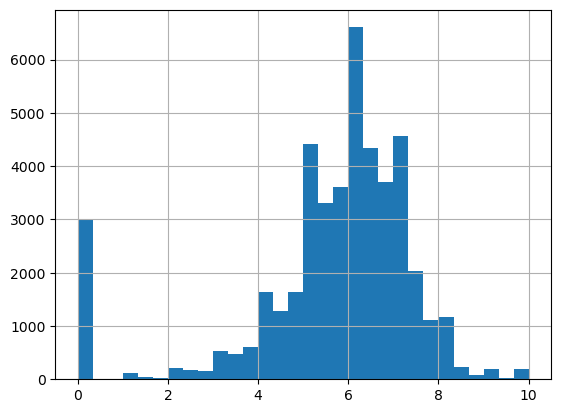

In [ ]:
# See the distribution of the ratings
data['vote_average'].hist(bins=30)

The histogram shows that most of the movies are rated between 5 and 8

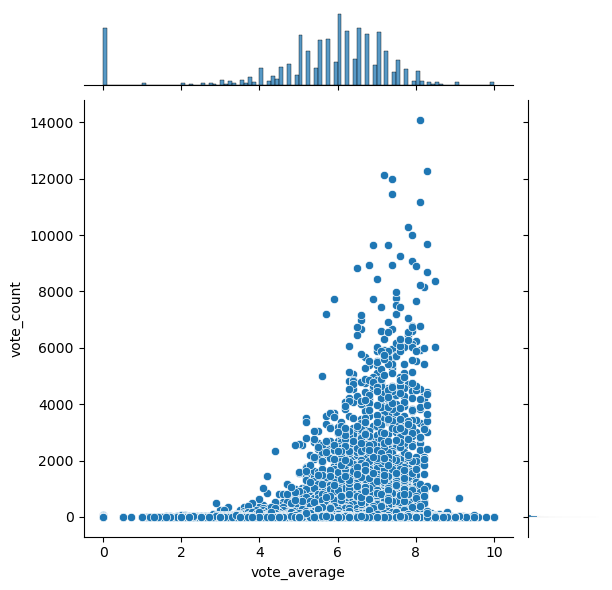

In [ ]:
# Check the relationship between the rating of a movie and the number of ratings. 
# We do this by plotting a scatter plot using seaborn
import seaborn as sb
sb.jointplot(x=data['vote_average'], y=data['vote_count'], data=data)

In [ ]:
data.sort_values('vote_average', ascending=False).head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
21642,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,320849,tt0886500,en,Ice Age Columbus: Who Were the First Americans?,Firmly rooted in the latest scientific discove...,...,2005-01-01,0.0,0.0,[],Released,NaN,Ice Age Columbus: Who Were the First Americans?,False,10.0,1.0
15710,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96451,tt1587373,en,If God Is Willing and da Creek Don't Rise,"In 2006, director Spike Lee created an astonis...",...,2010-08-23,0.0,255.0,[],Released,NaN,If God Is Willing and da Creek Don't Rise,False,10.0,1.0
22396,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,72123,tt1341746,en,Meat the Truth,Meat the Truth is a high-profile documentary w...,...,2008-10-03,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Meat the Truth,False,10.0,1.0
22395,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.marvinhamlischmovie.com/,230864,tt3011874,en,Marvin Hamlisch: What He Did For Love,When Marvin Hamlisch passed away in August 201...,...,2013-10-12,0.0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Marvin Hamlisch: What He Did For Love,False,10.0,1.0
35343,False,NaN,300000,"[{'id': 35, 'name': 'Comedy'}, {'id': 99, 'nam...",NaN,140595,tt0308213,en,Elaine Stritch: At Liberty,Judy at the Palace. Sinatra at Carnegie Hall. ...,...,2002-01-01,0.0,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Legendary performances come along so rarely.,Elaine Stritch: At Liberty,False,10.0,1.0
186,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",NaN,58372,tt0114241,en,Reckless,"On Christmas eve, a relentlessly cheerful woma...",...,1995-11-17,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The most twisted Christmas ever.,Reckless,False,10.0,1.0
45047,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,405446,tt6041312,es,El auge del humano,"Buenos Aires. Exe, 25 years old, has just lost...",...,2016-08-19,0.0,96.0,"[{'iso_639_1': 'pt', 'name': 'Português'}, {'i...",Released,NaN,The Human Surge,False,10.0,1.0
22377,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",http://oxenagos.gr/?page_id=186,163795,tt1592530,en,Ο Ξεναγός,Nine frustrated young architects in an equally...,...,2011-04-27,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The guide is never part of the group,The Guide,False,10.0,1.0
22346,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 80, '...",NaN,388182,tt2669832,fa,هیچ کجا هیچ کس,NaN,...,2013-08-07,0.0,NaN,[],Released,NaN,هیچ کجا هیچ کس,False,10.0,1.0
1634,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,64562,tt0119845,en,Other Voices Other Rooms,Truman Capote's semi-autobiographical first no...,...,1995-09-15,0.0,0.0,[],Released,NaN,Other Voices Other Rooms,False,10.0,1.0


In [ ]:
# Exclude all rows, where there is no votes or the number of votes is below a specified minimum
m = data['vote_count'].quantile(0.90)
print(m)

160.0


In [ ]:
# Make a copy and filter out the qualified movies into a new DataFrame
q_movies = data.copy().loc[data['vote_count'] >= m]
q_movies.shape

(4555, 24)

In [ ]:
data['vote_average']

0        7.7
1        6.9
2        6.5
3        6.1
4        5.7
        ... 
45461    4.0
45462    9.0
45463    3.8
45464    0.0
45465    0.0
Name: vote_average, Length: 45466, dtype: float64

In [ ]:
# Get the average value of all ratings in column 'vote_average'
C = data['vote_average'].mean()
print(C)

5.618207215134185


Compute the <b>weighted average rating</b> of each movie as a new feature

        WAR = v/(v+m)*R + m/(v+m)*C

where<br>

    R is the average Rating of this movie - votes_average<br>
    C is the average vote across the whole report, Currently <br>
    v is the number of votes for this movie - votes_count<br>
    m is the minimum number of votes required for a movie to be listed in the chart<br>    
    
This is the IMDb formula for calculating the Top Rated 250 titles,  
https://www.imdb.com/chart/top?ref_=nb_mv_3_chttp

In [ ]:
def war(x, m=m, c=C):
    v = x['vote_count']
    r = x['vote_average']
    return (v/(v+m) * r) + (m/(m+v) * c)

In [ ]:
# Define the new feature 'score'
# Calculate its values for the qualified dataframe with war()
q_movies['score'] = q_movies.apply(war, axis=1)
print(q_movies['score'])

0        7.640253
1        6.820293
4        5.660700
5        7.537201
8        5.556626
           ...   
45177    4.959104
45204    6.671272
45258    6.590372
45265    6.344369
45343    4.791783
Name: score, Length: 4555, dtype: float64


In [ ]:
#Sort movies in the dataframe based on the scores calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


## 2. Content-Based Recommender 

#### System that recommends movies similar to a particular movie
The idea is that 
- similar users share the same interest and 
- similar items are liked by one user

<br>Two types:
- User-based: measure the similarity between target users and other users
- Item-based: measure the similarity between the target items and other items

In [ ]:
# Description of a movie stays in the field/feature called 'overview'
# Print overviews of the first 5 movies to see the format
data['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

Doc format above is unappropriate for comparisson, needs transformation

We create word vector <b>Term Frequency-Inverse Document Frequency</b> (TF-IDF) for each overview.<br>
TF-IDF score shows the frequency of a word occurring in a document, 
down-weighted by the number of documents in which it occurs

For all documents, we create a matrix, where 

    each column represents one word in the overview vocabulary (all the words that appear in at least one document)
    each row represents one movie

In [ ]:
# Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

### 2.1. Prepare the data

In [ ]:
# Define a TF-IDF Vectorizer Object, while removing all english stop words such as 'the', 'a', ...
tfidf = TfidfVectorizer(stop_words='english')

# Replace all NaN with an empty string
data['overview'] = data['overview'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['overview'])

# It takes some time

In [ ]:
# Output the shape of tfidf_matrix
tfidf_matrix.shape

(45466, 75827)

In [ ]:
# Compute a similarity score
# We can implement either euclidean, Pearson, or cosine similarity scores

# To use cosine score, import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix for each vs each movie
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
print(cosine_sim)

[[1.         0.01504121 0.         ... 0.         0.00595453 0.        ]
 [0.01504121 1.         0.04681953 ... 0.         0.02198641 0.00929411]
 [0.         0.04681953 1.         ... 0.         0.01402548 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.00595453 0.02198641 0.01402548 ... 0.         1.         0.        ]
 [0.         0.00929411 0.         ... 0.         0.         1.        ]]


In [ ]:
# We need reverse mapping of movies and indices: to identify movie by index
# Construct a reverse map of indices and movie titles
indices = pd.Series(data.index, index=data['title']).drop_duplicates()

In [ ]:
print(indices)

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Subdue                         45461
Century of Birthing            45462
Betrayal                       45463
Satan Triumphant               45464
Queerama                       45465
Length: 45466, dtype: int64


### 2.2. Define a Function

Define a function that takes in a movie __title__ as an input and outputs a list of the 10 most similar movies
by identifying the __index__ of a movie in your metadata DataFrame, given its title
1. Get the index of the movie given its title.
2. Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its __position__ and the second is the similarity score.
3. Sort the aforementioned list of tuples based on the __similarity scores__; that is, the second element.
4. Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar        to a particular movie is the movie itself).
5. Return the titles corresponding to the indices of the top elements.

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data['title'].iloc[movie_indices]

### 2.3. Test the Recommender

In [ ]:
get_recommendations('The Shawshank Redemption')

16947                   They Made Me a Fugitive
6548                                Civil Brand
39141                         Seven Times Seven
11327                               Brute Force
36701                            Women's Prison
17446                           Girls in Prison
9391                                    In Hell
34185                   Women's Prison Massacre
9225     Female Prisoner Scorpion: Jailhouse 41
41606                           Alcatraz Island
Name: title, dtype: object

In [ ]:
get_recommendations('Life Is Beautiful')

15808                            Kapo
37401                 The bitter herb
12446              The Counterfeiters
27452         The Diary of Anne Frank
33324               The Little Prince
29651              The Biggest Battle
25626                Out of the Ashes
27234                     Johnny Cool
21323              Forest of the Gods
14849    The Secret of Santa Vittoria
Name: title, dtype: object

In [ ]:
get_recommendations('Star Trek')

1327                         Star Trek IV: The Voyage Home
1324                       Star Trek V: The Final Frontier
1326                   Star Trek III: The Search for Spock
32220    Mind Meld: Secrets Behind the Voyage of a Life...
32130                                The Story of O Part 2
40460                                For the Love of Spock
6575                                            Paper Moon
38309                                  Teen-Age Crime Wave
9059                           Pumpkinhead II: Blood Wings
34176                                    American Warships
Name: title, dtype: object

In [6]:
!python -m streamlit run app.py